In [24]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [ ]:
#Dirty dataset - part 1

In [2]:
df = pd.read_csv("Data_Analyst_Sample.csv")

In [ ]:
# Display the first 5 rows of the dataframe
print(df.head())

In [ ]:
# Display the last 5 rows of the dataframe
print(df.tail())

In [ ]:
# Display some basic statistical information about the dataframe
print(df.describe())

In [ ]:
df.shape

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

In [21]:
df = df.dropna(subset=df.select_dtypes(include=['object']).columns, how='any')

In [24]:
df.update(df[df.select_dtypes(include=['int', 'float']).columns].fillna(0))

In [ ]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(0, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
df.notnull().all()

In [ ]:
#Dirty dataset - part 2

In [119]:

# read the errors.csv file into a dataframe
errors_df = pd.read_csv("errors.csv")

In [121]:
# read the Data_Analyst_Sample.csv file into a dataframe
data_df = pd.read_csv("Data_Analyst_Sample.csv")

In [ ]:
# count the number of errors in the dataset
error_count = 0
data_df["Campaign Name"] = data_df["Campaign Name"].astype(str)
for i, row in errors_df.iterrows():
    if data_df["Campaign Name"].str.contains(row["Campaign error name"]).any():
        error_count += 1
        # use the .replace() method to correct the errors
        data_df["Campaign Name"].replace(row["Campaign error name"], row["Campaign correct"], inplace=True)

print("Number of errors found:", error_count)

In [ ]:
# verify the errors have been corrected
print("Errors corrected:", error_count)

In [118]:
# export the corrected "Campaign Name" column to a .csv file
data_df[["Campaign Name"]].to_csv("corrected_campaign_names.csv", index=False)

In [27]:
#Core Learning 3 - Exploratory Data Analysis (EDA)

In [25]:
# Reading the csv file and storing it in a variable named 'data'
data = pd.read_csv('./Superstore_data_sample.csv')

In [ ]:
# exploration methods

In [ ]:
# Using the head() method to display the first 5 rows of the data
print(data.head())

In [ ]:
# Using the describe() method to display the statistical summary of the numerical columns
print(data.describe())

In [ ]:
# Using the info() method to display the information of the dataframe
print(data.info())

In [ ]:
# check the shape of the data (rows, columns)
print(data.shape)

In [ ]:
# check the columns with missing values
print(data.isnull().sum())

In [21]:
# Remove missing values from columns with object datatype
df = data.dropna(subset=data.select_dtypes(include=['object']).columns, how='any')

In [22]:
# Replace missing values with zero in columns with numeric datatype
df = df.fillna(0)

In [ ]:
# # verify that there are no missing values
print(df.isnull().sum().sum()) # prints the total number of missing values in the dataframe

In [ ]:
##Random

In [27]:
# import the data file
df = pd.read_csv('Superstore_data_sample.csv')

In [ ]:
# check data types
print(df.dtypes)

In [ ]:
# check for missing values
print(df.isnull().sum())

In [32]:
# drop duplicate values
df = df.drop_duplicates()

In [ ]:
# check for missing values
print(df.isnull().sum())

In [34]:
# drop unnecessary columns
df = df.drop(['Row ID','Order ID','Customer ID','Product ID'], axis=1)

In [36]:
# standardize date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [37]:
# remove outliers
df = df[df['Profit'] > 0]

In [40]:
# group data by category
category_group = df.groupby(by='Category').sum()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_33992\609645015.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_group = df.groupby(by='Category').sum()


In [50]:
# create a new column that contains the values of sales and profit as a tuple
df['Sales_Profit'] = list(zip(df.Sales, df.Profit))

In [52]:
# reshape the dataframe in long format
df = pd.melt(df, id_vars=['Category'], value_vars=['Sales', 'Profit'], var_name='sales_profit', value_name='value')

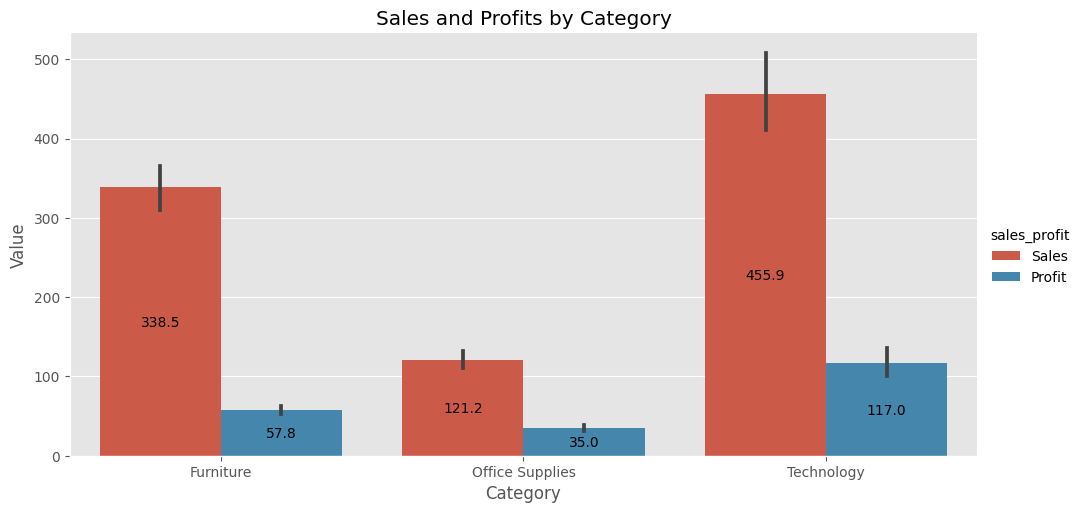

In [77]:
# create a catplot
g = sns.catplot(x='Category', y='value', hue='sales_profit', kind='bar', data=df, height=5, aspect=2)

# add title and labels
plt.title("Sales and Profits by Category")
plt.xlabel("Category")
plt.ylabel("Value")

# add y values on top of each bar and round it to the nearest .0
for i in g.ax.containers:
    for j in i:
        g.ax.text(j.get_x() + j.get_width()/2., j.get_height()/2-10, round(j.get_height(),1), ha='center', va='bottom')

# show the plot
plt.show()